# k-Means Clustering

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.cluster import KMeans
from scipy import stats
import random

## Exploratory Data Analysis

In [29]:
songs = pd.read_csv("songs.csv")
songs.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.244,0.982,8,-5.079,0.109,0.000005,0.905,0.0638,0.1960,189.746
1,0.368,0.995,6,-4.894,0.183,0.000013,0.849,0.1590,0.1430,98.040
2,0.227,0.981,6,-5.343,0.145,0.000006,0.840,0.0581,0.1240,115.207
3,0.265,0.993,8,-4.949,0.173,0.000008,0.901,0.1300,0.0857,100.688
4,0.348,0.998,2,-5.299,0.208,0.000006,0.897,0.1610,0.0391,109.997


In [30]:
songs.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.474455,0.648439,4.887500,-9.317790,0.134125,0.328556,0.380162,0.231836,0.354982,119.033740
std,0.185507,0.337503,3.510078,6.408121,0.112793,0.410574,0.411473,0.221760,0.241950,33.612645
min,0.111000,0.006460,0.000000,-32.009000,0.025000,0.000002,0.000000,0.044600,0.028800,41.762000
25%,0.317500,0.323750,1.000000,-14.605000,0.039875,0.001010,0.000000,0.098175,0.142750,90.136750
50%,0.500500,0.767000,4.000000,-6.074000,0.088700,0.058400,0.081700,0.130000,0.299500,118.023500
75%,0.624000,0.939500,8.000000,-4.891750,0.208500,0.887000,0.871500,0.269750,0.543500,142.069500
max,0.901000,0.999000,11.000000,-2.403000,0.489000,0.996000,0.983000,0.975000,0.950000,196.106000


In [31]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
danceability        400 non-null float64
energy              400 non-null float64
key                 400 non-null int64
loudness            400 non-null float64
speechiness         400 non-null float64
acousticness        400 non-null float64
instrumentalness    400 non-null float64
liveness            400 non-null float64
valence             400 non-null float64
tempo               400 non-null float64
dtypes: float64(9), int64(1)
memory usage: 31.4 KB


**Remove outliers from wine data set using z-scores (z-scores of 3 or more are considered unusual).**

In [32]:
z_scores = stats.zscore(songs)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_songs = songs[filtered_entries]
filtered_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 399
Data columns (total 10 columns):
danceability        384 non-null float64
energy              384 non-null float64
key                 384 non-null int64
loudness            384 non-null float64
speechiness         384 non-null float64
acousticness        384 non-null float64
instrumentalness    384 non-null float64
liveness            384 non-null float64
valence             384 non-null float64
tempo               384 non-null float64
dtypes: float64(9), int64(1)
memory usage: 33.0 KB


## Genre Classification

### Find Number of Genres

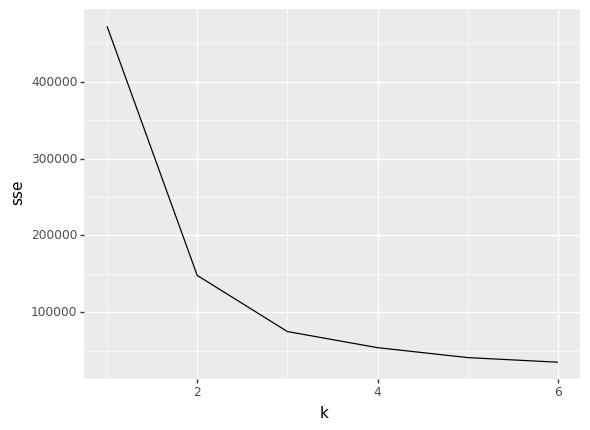

<ggplot: (303671085)>

In [33]:
x = songs.iloc[:,:]
sse = {}
for k in range(1,7):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(x)
    sse[k] = km.inertia_
df = pd.DataFrame({"k":list(sse.keys()),"sse":list(sse.values())})
ggplot(df,aes(x="k",y="sse"))+geom_line()

**Using the elbow method, the optimal number of genres is 4.**

### Reduce Number of Properties

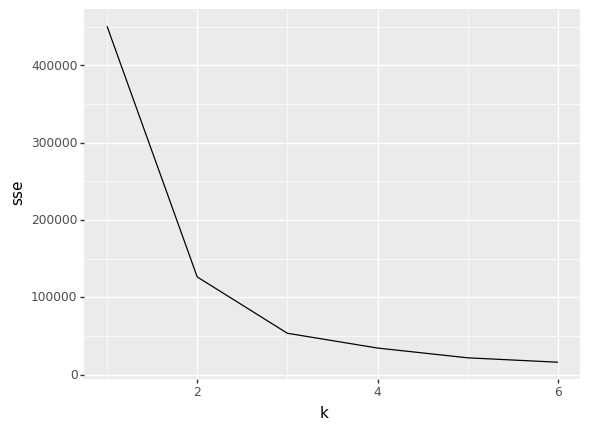

<ggplot: (303671257)>

In [34]:
x = songs.iloc[:,[8,9]]
sse = {}
for k in range(1,7):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(x)
    sse[k] = km.inertia_
df = pd.DataFrame({"k":list(sse.keys()),"sse":list(sse.values())})
ggplot(df,aes(x="k",y="sse"))+geom_line()

**This elbow graph is fairly close to the elbow graph of the entire data (4 is still the optimal number of genres). Thus, "valence" and "tempo" are the best predictors in genre.**

### Validation

In order to validate this model, there are 2 different in determining the true genre of each song. For one, can look up each song in the dataset and find out what the genre of each song is by listening to it or looking up the decided genre (this assumes that the genre has already been classified and we have access to the song information). Secondly, we can talk to a domain expert who can classify the genres of each song looking at the data we are given (this may not be as accurate since they will not have access to the song itself). Next, once we have obtained the "true" genre of each song, we can create a training and testing set and compare our songs labeled genre in our test with the actual genre (and compute the accuracy).

## k-Means Algorithm

@param df 2 independent variables from a dataframe

@return df\["cluster"\] Column of clusters for each row in dataframe

In [35]:
def kMeans(df):
    centroids = df.sample(2, replace=False) #initialize 2 centroids to random value
    clusters = pd.DataFrame() #initialize clusters
    max_iter = 20 #maximum number of iterations
    for i in range(max_iter):
        j = 0
        for index, point in centroids.iterrows():
            clusters[j] = (df[centroids.columns] - np.array(point)).pow(2).sum(1).pow(0.5) #clusters equal to distance from centroid to point
            j += 1
        df['cluster'] = clusters.idxmin(axis=1) #creates column cluster equal to centroid with the min distance from a point 
        centroids = pd.DataFrame()
        centroids_frame = df.groupby('cluster').agg(np.mean) #centroid equal to mean of its cluster
        centroids[centroids_frame.columns] = centroids_frame[centroids_frame.columns]
    return df["cluster"] #return cluster column

### Testing

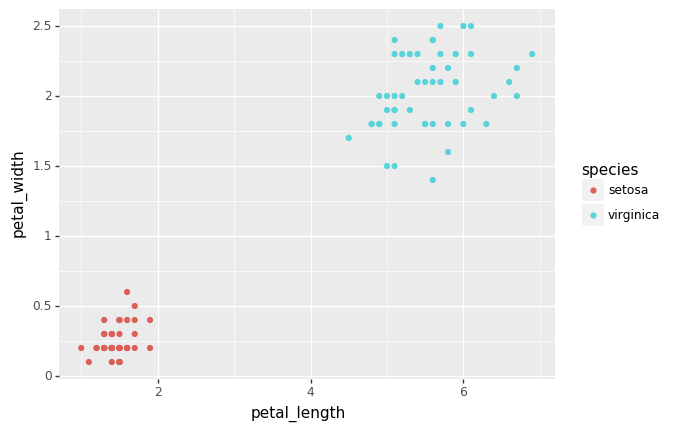

<ggplot: (301751233)>

In [30]:
iris = pd.read_csv("iris.csv")
iris = iris.loc[iris["species"]!="versicolor"]
iris = iris.iloc[:,2:]
ggplot(iris,aes(x="petal_length",y="petal_width",color="species"))+geom_point()

**Test k-Means Algorithm on iris data set.**

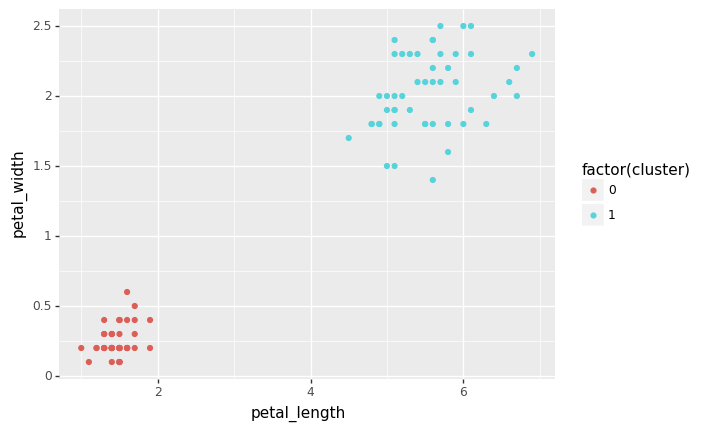

<ggplot: (300664161)>

In [36]:
iris["cluster"] = kMeans(iris.iloc[:,0:1])
ggplot(iris,aes(x="petal_length",y="petal_width",color="factor(cluster)"))+geom_point()